In [23]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

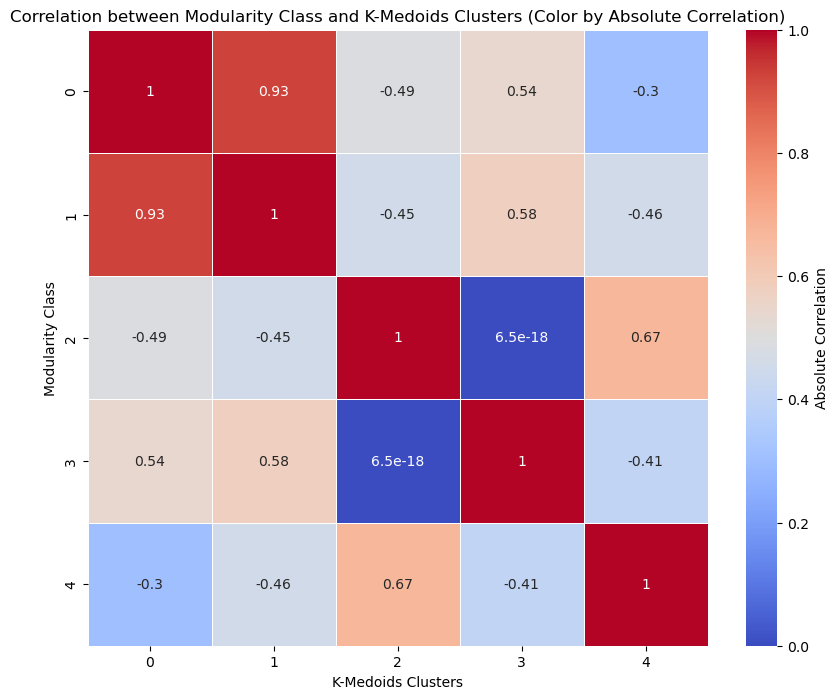

In [21]:
df1 = pd.read_csv('deputies_education_centrality.csv')
df2 = pd.read_csv('cluster_final.csv')

def convert_to_initials(full_name):
    parts = full_name.split()
    if len(parts) >= 2:
        initials = f"{parts[0]} {parts[1][0]}. {parts[2][0]}."
        return initials
    return full_name

df1['id_deputy'] = df1['Id'].apply(convert_to_initials)


df2 = df2.rename(columns={'Актор': 'id_deputy'})

merged_df = pd.merge(df1[['id_deputy', 'modularity_class']], df2[['id_deputy', 'clusters_kmedoids5']], on='id_deputy')

contingency_table = pd.crosstab(merged_df['modularity_class'], merged_df['clusters_kmedoids5'])


correlation_matrix = contingency_table.corr()
abs_correlation_matrix = correlation_matrix.abs()

plt.figure(figsize=(10, 8))
sns.heatmap(abs_correlation_matrix, annot=correlation_matrix, cmap='coolwarm', linewidths=.5, cbar_kws={'label': 'Absolute Correlation'})
plt.title('Correlation between Modularity Class and K-Medoids Clusters (Color by Absolute Correlation)')
plt.xlabel('K-Medoids Clusters')
plt.ylabel('Modularity Class')
plt.show()


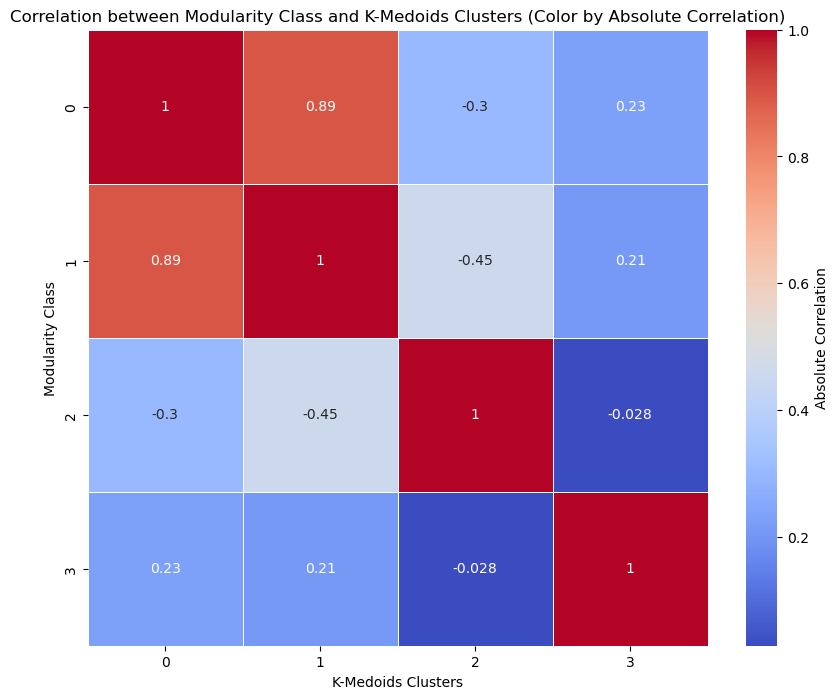

In [22]:
merged_df = pd.merge(df1[['id_deputy', 'modularity_class']], df2[['id_deputy', 'clusters_kmedoids4']], on='id_deputy')

contingency_table = pd.crosstab(merged_df['modularity_class'], merged_df['clusters_kmedoids4'])


correlation_matrix = contingency_table.corr()

abs_correlation_matrix = correlation_matrix.abs()


plt.figure(figsize=(10, 8))
sns.heatmap(abs_correlation_matrix, annot=correlation_matrix, cmap='coolwarm', linewidths=.5, cbar_kws={'label': 'Absolute Correlation'})
plt.title('Correlation between Modularity Class and K-Medoids Clusters (Color by Absolute Correlation)')
plt.xlabel('K-Medoids Clusters')
plt.ylabel('Modularity Class')
plt.show()

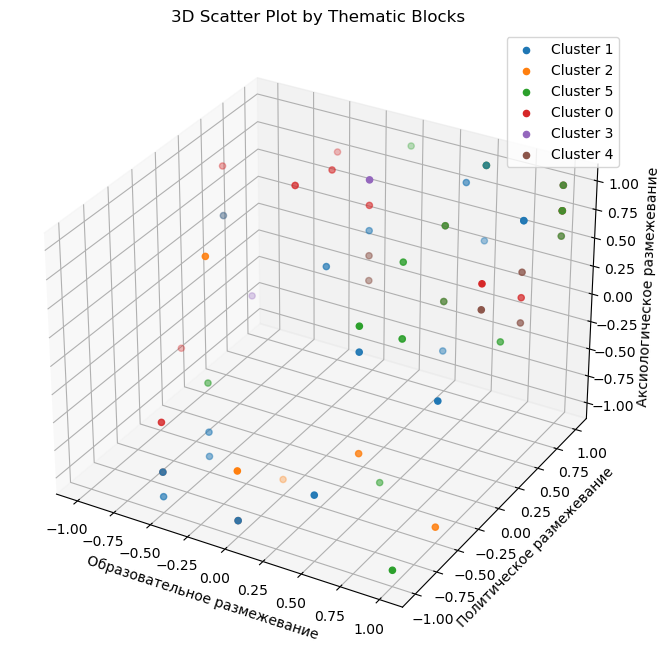

In [26]:
modularity_classes = pd.read_csv('deputies_education_centrality.csv')
coalitions = pd.read_csv('cluster_final.csv')

def convert_to_initials(full_name):
    parts = full_name.split()
    if len(parts) >= 2:
        initials = f"{parts[0]} {parts[1][0]}. {parts[2][0]}."
        return initials
    return full_name

modularity_classes['id_deputy'] = modularity_classes['Id'].apply(convert_to_initials)


coalitions = coalitions.rename(columns={'Актор': 'id_deputy'})



data = coalitions.merge(modularity_classes, on='id_deputy')


blocks = {
    'Образовательное размежевание': [
        'Возможности для получения высшего образования',
        'Качество образования',
        'Грамотность населения',
        'Наука - главный приоритет'
    ],
    'Политическое размежевание': [
        'Дихотомия “личность - государство”',
        'Идеологическая ориентация аргументов',
        'Западная риторика',
        'Критика власти'
    ],
    'Аксиологическое размежевание': [
        'Экономическое международное сотрудничество',
        'Политическое сотрудничество с разными странами',
        'Дихотомия “личность - коллектив” (приоритетность развития)',
        'Ценности, связанные с материальным благосостоянием граждан',
        'Ценности, связанные с уровнем развития общества',
        'Место исторического нарратива',
        'Наиболее общие ценностные приоритеты',
        'Отношение к культуре и идентичности',
        'Позиция по изменениям, реформам по направлениям политики'
    ]
}

missing_columns = []
for block, columns in blocks.items():
    for column in columns:
        if column not in data.columns:
            missing_columns.append(column)

if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    
    for block, columns in blocks.items():
        data[block] = data[columns].mean(axis=1)
    
    # Определение колонок для графика
    x_col = 'Образовательное размежевание'
    y_col = 'Политическое размежевание'
    z_col = 'Аксиологическое размежевание'
    cluster_col = 'modularity_class'

    # Построение 3D scatter plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    for cluster in data[cluster_col].unique():
        clustered_data = data[data[cluster_col] == cluster]
        ax.scatter(clustered_data[x_col], clustered_data[y_col], clustered_data[z_col], label=f'Cluster {cluster}')

    ax.set_title('3D Scatter Plot by Thematic Blocks')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_zlabel(z_col)
    ax.legend()

    plt.show()

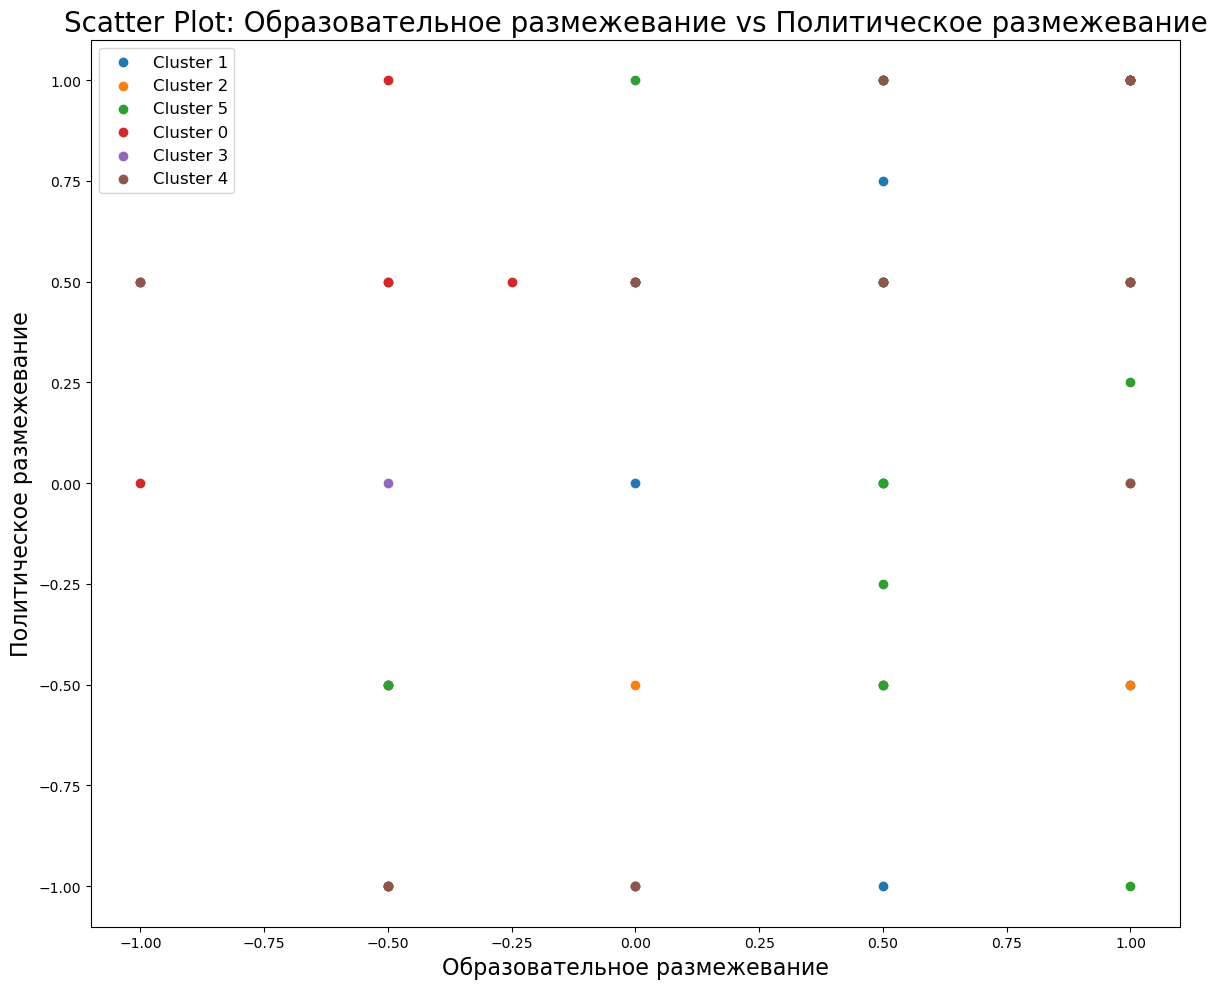

In [36]:
x_cols = ['Образовательное размежевание', 'Образовательное размежевание', 'Политическое размежевание']
y_cols = ['Политическое размежевание', 'Аксиологическое размежевание', 'Аксиологическое размежевание']
cluster_col = 'modularity_class'
   
x_col = x_cols[0]
y_col = y_cols[0]
plt.figure(figsize=(12, 10))
for cluster in data[cluster_col].unique():
    clustered_data = data[data[cluster_col] == cluster]
    plt.scatter(clustered_data[x_col], clustered_data[y_col], label=f'Cluster {cluster}')
plt.title(f'Scatter Plot: {x_col} vs {y_col}', fontsize=20)
plt.xlabel(x_col, fontsize=16)
plt.ylabel(y_col, fontsize=16)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

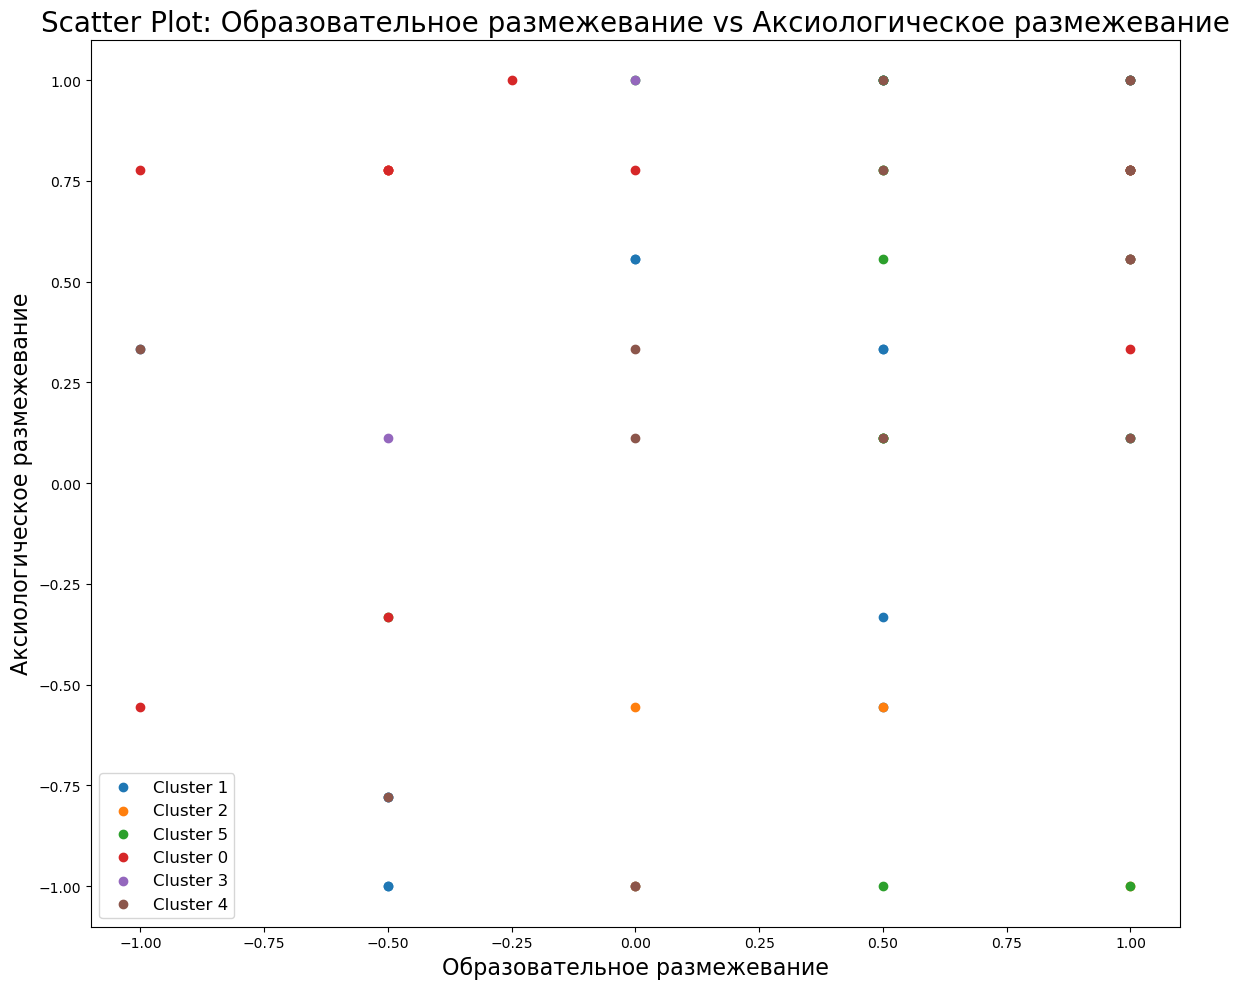

In [38]:
x_col = x_cols[1]
y_col = y_cols[1]
plt.figure(figsize=(12, 10))
for cluster in data[cluster_col].unique():
    clustered_data = data[data[cluster_col] == cluster]
    plt.scatter(clustered_data[x_col], clustered_data[y_col], label=f'Cluster {cluster}')
    
plt.title(f'Scatter Plot: {x_col} vs {y_col}', fontsize=20)
plt.xlabel(x_col, fontsize=16)
plt.ylabel(y_col, fontsize=16)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

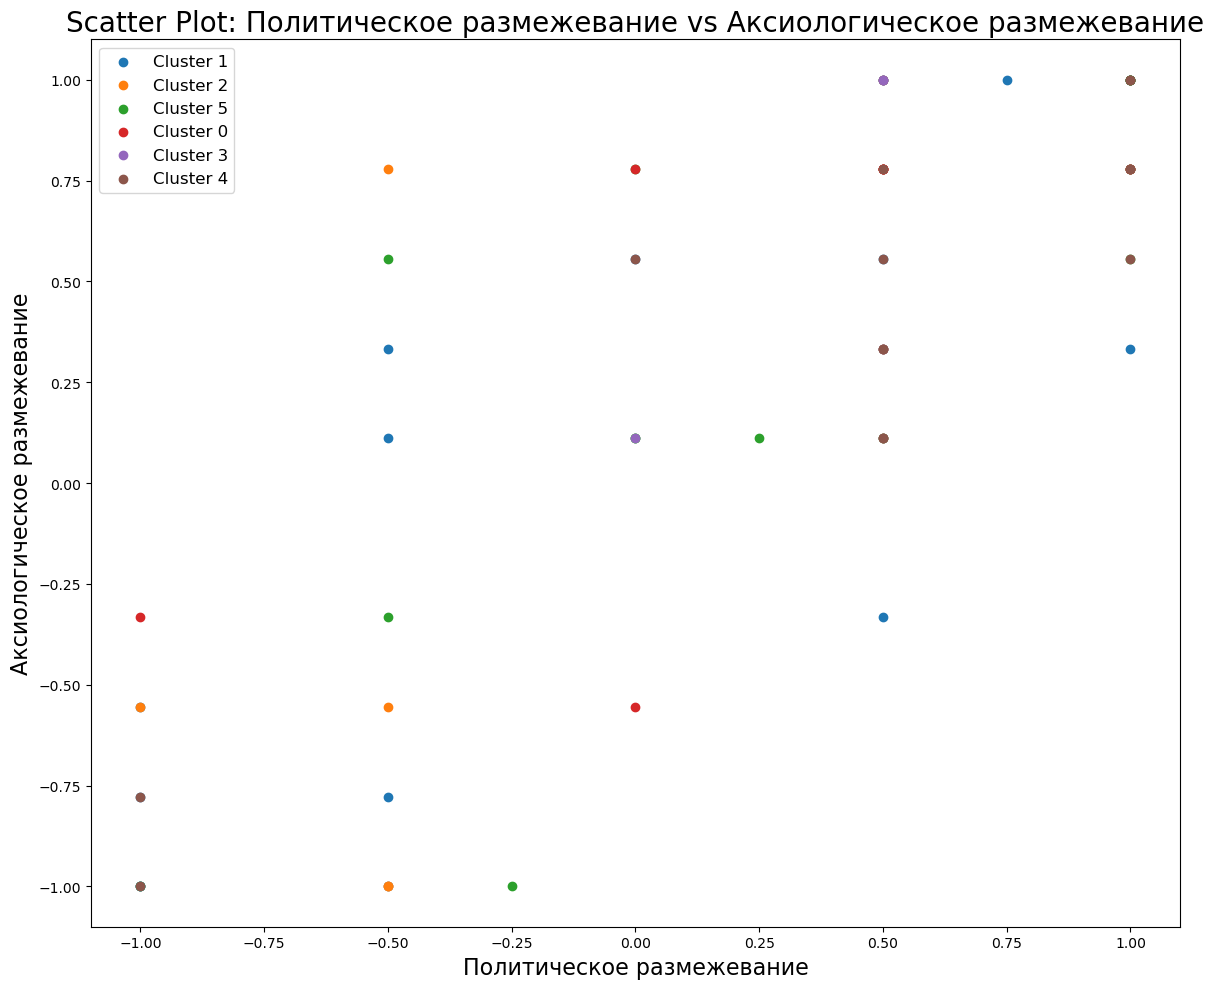

In [39]:
x_col = x_cols[2]
y_col = y_cols[2]
plt.figure(figsize=(12, 10))

for cluster in data[cluster_col].unique():
    clustered_data = data[data[cluster_col] == cluster]
    plt.scatter(clustered_data[x_col], clustered_data[y_col], label=f'Cluster {cluster}')
    
plt.title(f'Scatter Plot: {x_col} vs {y_col}', fontsize=20)
plt.xlabel(x_col, fontsize=16)
plt.ylabel(y_col, fontsize=16)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()